In [1]:
import Scraping.Scraper 
import Gemini.GeminiPredict 
import Generation.Equation_BaseDataset 
import Postprocessing.SOE_EquationGraph 


import os
import google.generativeai as genai
from sympy import *
import pandas as pd
import importlib
import matplotlib.pyplot as plt

c:\Users\kyanj\anaconda3\envs\fyp_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Main

In [2]:
importlib.reload(Scraping.Scraper)
importlib.reload(Gemini.GeminiPredict)
importlib.reload(Generation.Equation_BaseDataset)
importlib.reload(Postprocessing.SOE_EquationGraph)

from Gemini.GeminiPredict import GeminiPredict
from Generation.Equation_BaseDataset import Equation, BaseDataset
from Postprocessing.SOE_EquationGraph import SystemOfEquations, EquationGraph
from Scraping.Scraper import Scraper

Request successful 

API key loaded successfully!


Generating Curve: 100%|██████████| 101/101 [00:24<00:00,  4.13it/s]


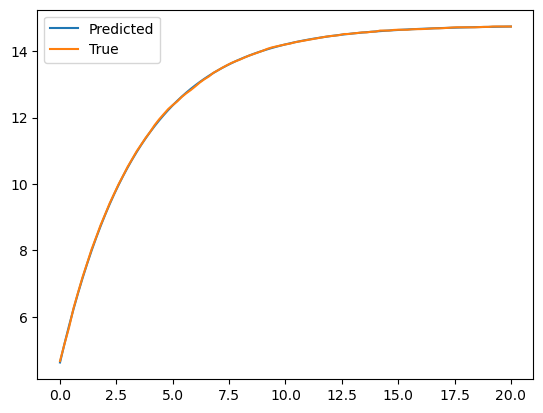

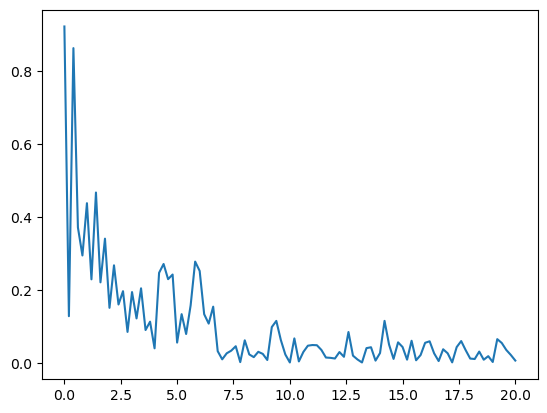

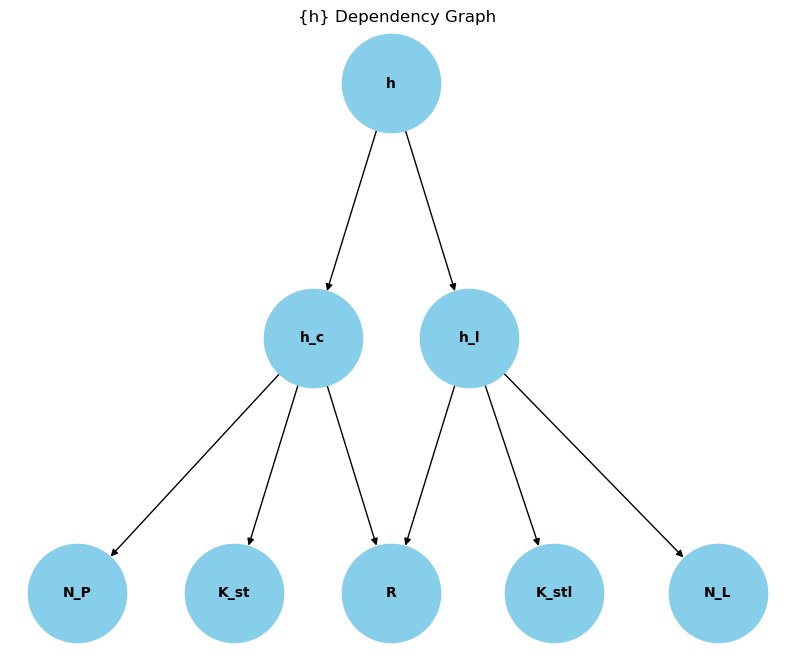

In [8]:
# 1. Scraping journal data
doi = "10.1016/j.jmatprotec.2017.04.005"
elsevier_api_key = os.getenv("ELSEVIER_API_KEY")
scraper = Scraper(doi, elsevier_api_key)
mathml_dict, const_dict = scraper.scrape()
const_dict["δ"] = 1.5e-5 # user-set model parameter


# print(mathml_dict, const_dict)
# const_dict = {'k_s (kW/mK)': 0.14, 'k_t (H13)': 0.0244, 'k_t (Cast iron)': 0.044, 'k_t (P20)': 0.0315, 'k_l (Lubricant)': 0.024, 'R_s (m)': 3.4e-07, 'R_t (H13)': 9.8e-07, 'R_t (Cast iron)': 8.1e-07, 'R_t (P20)': 9.6e-07, 'h_a (kW/m2K)': 0.8, 'σ_U (MPa)': 21.0, 'α (−)': 0.000201, 'λ (−)': 6.05, 'β (−)': 0.00011, 'γ (m−1)': 200000.0}
# mathml_equations = []
# with open("Data/HTC_equations.txt", "r", encoding="utf-8") as file:
#     for line in file:
#         mathml_equations.append(line.strip())


# 2. Equation translation
gemini_api_key = os.getenv("GEMINI_API_KEY")   
model_name = "tunedModels/mmltopython4-f3fuppiemnq9"
predictor = GeminiPredict(gemini_api_key, model_name)
mathml_equations = list(mathml_dict.values())
full_equations = predictor.generate_predictions(mml_list=mathml_equations)

# print(full_equations)

# 3. Solving system of equations
column_names = ["P", "h"]
p20_df = pd.read_csv("Data/p20.csv", header=None, names=column_names)
P_list = pd.to_numeric(p20_df["P"]).tolist()
h_list_ref = pd.to_numeric(p20_df["h"]).tolist()
solver = SystemOfEquations(equations=full_equations)
# print(solver.get_sympy_equations())
solutions = solver.solve_system(const_dict=const_dict,
                                independent_vals=P_list,
                                independent_symbol="P",
                                target_symbol="h",
                                equation_number=6)

# 4. Outputs
solver.plot_graph(P_list, solutions, h_list_ref)
solver.plot_error_graph(P_list, solutions, h_list_ref)
solver.plot_dependency_graph(save=False)

# plt.plot(P_list, solutions)
# plt.show()

API key loaded successfully!


Generating Curve: 100%|██████████| 101/101 [00:25<00:00,  3.99it/s]


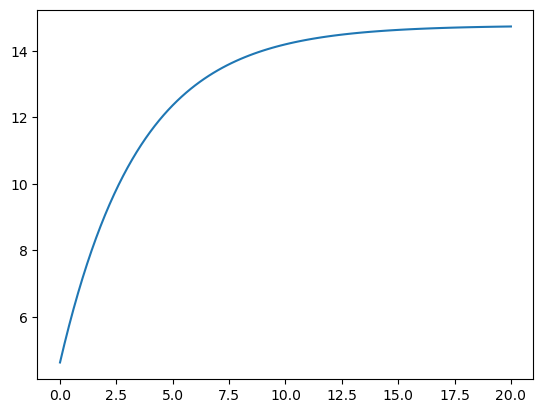

In [8]:
# 1. Scraping journal data
# doi = "10.1016/j.jmatprotec.2017.04.005"
# elsevier_api_key = os.getenv("ELSEVIER_API_KEY")
# scraper = Scraper(doi, elsevier_api_key)
# mathml_dict, const_dict = scraper.scrape()

# print(mathml_dict, const_dict)
const_dict = {'k_s (kW/mK)': 0.14, 'k_t (H13)': 0.0244, 'k_t (Cast iron)': 0.044, 'k_t (P20)': 0.0315, 'k_l (Lubricant)': 0.024, 'R_s (m)': 3.4e-07, 'R_t (H13)': 9.8e-07, 'R_t (Cast iron)': 8.1e-07, 'R_t (P20)': 9.6e-07, 'h_a (kW/m2K)': 0.8, 'σ_U (MPa)': 21.0, 'α (−)': 0.000201, 'λ (−)': 6.05, 'β (−)': 0.00011, 'γ (m−1)': 200000.0}
const_dict["δ"] = 0 # WIP hardcoded for now
mathml_equations = []
with open("Data/HTC_equations.txt", "r", encoding="utf-8") as file:
    for line in file:
        mathml_equations.append(line.strip())


# 2. Equation translation
gemini_api_key = os.getenv("GEMINI_API_KEY")   
model_name = "tunedModels/mmltopython4-f3fuppiemnq9"
predictor = GeminiPredict(gemini_api_key, model_name)
# mathml_equations = list(mathml_dict.values())
full_equations = predictor.generate_predictions(mml_list=mathml_equations)

# print(full_equations)

# 3. Solving system of equations
column_names = ["P", "h"]
p20_df = pd.read_csv("Data/p20.csv", header=None, names=column_names)
P_list = pd.to_numeric(p20_df["P"]).tolist()
h_list_ref = pd.to_numeric(p20_df["h"]).tolist()
solver = SystemOfEquations(equations=full_equations)
# print(solver.get_sympy_equations())
solutions2 = solver.solve_system(const_dict=const_dict,
                                independent_vals=P_list,
                                independent_symbol="P",
                                target_symbol="h",
                                equation_number=6)

# 4. Outputs
# solver.plot_graph(P_list, solutions, h_list_ref)
# solver.plot_error_graph(P_list, solutions, h_list_ref)
# solver.plot_dependency_graph(save=False)

plt.plot(P_list, solutions2)
plt.show()

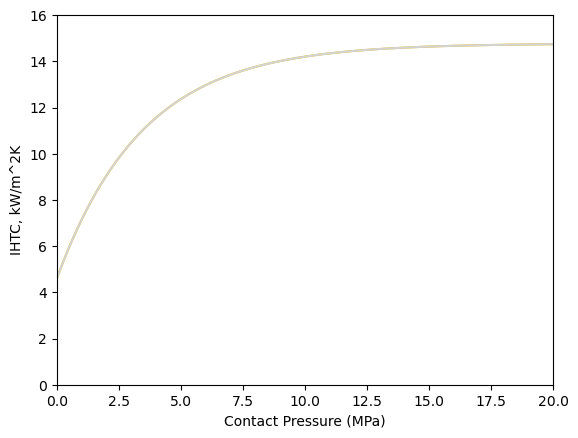

In [9]:
plt.plot(P_list, solutions, color="#ecc100")
plt.plot(P_list, solutions2, color="#D3D3D3")
plt.ylim(0, 16)
plt.xlim(0, 20)
plt.xlabel("Contact Pressure (MPa)")
plt.ylabel("IHTC, kW/m^2K")
plt.savefig("Figures/bothIHTC.svg")

### Scraping

In [5]:
doi = "10.1016/j.triboint.2021.106934"
elsevier_api_key = os.getenv("ELSEVIER_API_KEY")
scraper = Scraper(doi, elsevier_api_key)
mathml_dict, const_dict = scraper.scrape()
print(mathml_dict)

Request successful 



Exception: No equations found. Ensure your WiFi account is verified with Elsevier.

### Gemini

In [ ]:
gemini_api_key = os.getenv("GEMINI_API_KEY")
# model_name = "models/gemini-1.5-flash"
model_name = "tunedModels/mmltopython4-f3fuppiemnq9"
predictor = GeminiPredict(gemini_api_key, model_name)
mathml_equations = list(mathml_dict.values())
i = 2
eq = str(mathml_equations[i])
print(type(eq))
# text = predictor.predict('<mml:mrow>\n<mml:mi>h</mml:mi>\n<mml:mo>=</mml:mo>\n<mml:mfrac>\n<mml:mrow>\n<mml:mn>1</mml:mn>\n<mml:mo>−</mml:mo>\n<mml:mi>A</mml:mi>\n</mml:mrow>\n<mml:mrow>\n<mml:msub>\n<mml:mi>h</mml:mi>\n<mml:mi>f</mml:mi>\n</mml:msub>\n</mml:mrow>\n</mml:mfrac>\n<mml:mfrac>\n<mml:mrow>\n<mml:mn>2</mml:mn>\n<mml:msub>\n<mml:mi>k</mml:mi>\n<mml:mi>f</mml:mi>\n</mml:msub>\n<mml:msub>\n<mml:mi>k</mml:mi>\n<mml:mi>t</mml:mi>\n</mml:msub>\n<mml:msub>\n<mml:mi>k</mml:mi>\n<mml:mi>w</mml:mi>\n</mml:msub>\n</mml:mrow>\n<mml:mrow>\n<mml:mn>2</mml:mn>\n<mml:msub>\n<mml:mi>k</mml:mi>\n<mml:mi>t</mml:mi>\n</mml:msub>\n<mml:msub>\n<mml:mi>k</mml:mi>\n<mml:mi>w</mml:mi>\n</mml:msub>\n<mml:mo>−</mml:mo>\n<mml:msub>\n<mml:mi>k</mml:mi>\n<mml:mi>w</mml:mi>\n</mml:msub>\n<mml:msub>\n<mml:mi>k</mml:mi>\n<mml:mi>f</mml:mi>\n</mml:msub>\n<mml:mo>−</mml:mo>\n<mml:msub>\n<mml:mi>k</mml:mi>\n<mml:mi>f</mml:mi>\n</mml:msub>\n<mml:msub>\n<mml:mi>k</mml:mi>\n<mml:mi>t</mml:mi>\n</mml:msub>\n</mml:mrow>\n</mml:mfrac>\n</mml:mrow>')
text = predictor.predict(eq)
print(text)

In [3]:
full_equations = ["h = Symbol('h')\nh_g = Symbol('h_g')\nh_c = Symbol('h_c')\ne = Eq(h, h_g + h_c)", "h = Symbol('h')\nk = Symbol('k')\nθ = Symbol('θ')\nσ = Symbol('σ')\np = Symbol('p')\nH = Symbol('H')\ne = Eq(h, 1.45*k*tan(θ)/σ*(p/H)**0.985)", "h = Symbol('h')\nλ = Symbol('λ')\np = Symbol('p')\nC = Symbol('C')\nσ_U = Symbol('σ_U')\nK = Symbol('K')\ne = Eq(h, 8000*λ*(p/(C*σ_U)*K)**0.86)", "h = Symbol('h')\nA = Symbol('A')\nB = Symbol('B')\nP = Symbol('P')\ne = Eq(h, A*(1 - exp(-B*P)))", "h = Symbol('h')\nA = Symbol('A')\nh_f = Symbol('h_f')\nk_f = Symbol('k_f')\nk_t = Symbol('k_t')\nk_w = Symbol('k_w')\ne = Eq(h, (1 - A)/h_f*2*k_f*k_t*k_w/(2*k_t*k_w - k_w*k_f - k_f*k_t))", "h = Symbol('h')\nh_a = Symbol('h_a')\nh_c = Symbol('h_c')\nh_l = Symbol('h_l')\ne = Eq(h, h_a + h_c + h_l)", "h_c = Symbol('h_c')\nα = Symbol('α')\nK_st = Symbol('K_st')\nN_P = Symbol('N_P')\nR = Symbol('R')\ne = Eq(h_c, α*K_st*N_P/R)", "K_st = Symbol('K_st')\nk_s = Symbol('k_s')\nk_t = Symbol('k_t')\ne = Eq(K_st, 2/(k_s**(-1) + k_t**(-1)))", "R = Symbol('R')\nR_s = Symbol('R_s')\nR_t = Symbol('R_t')\ne = Eq(R, sqrt(R_s**2 + R_t**2))", "N_P = Symbol('N_P')\nλ = Symbol('λ')\nP = Symbol('P')\nσ_U = Symbol('σ_U')\ne = Eq(N_P, 1 - exp(-λ*P/σ_U))", "h_l = Symbol('h_l')\nβ = Symbol('β')\nK_stl = Symbol('K_stl')\nN_L = Symbol('N_L')\nR = Symbol('R')\ne = Eq(h_l, β*K_stl*N_L/R)", "K_stl = Symbol('K_stl')\nk_s = Symbol('k_s')\nk_t = Symbol('k_t')\nk_l = Symbol('k_l')\ne = Eq(K_stl, 3/(k_s**(-1) + k_t**(-1) + k_l**(-1)))", "N_L = Symbol('N_L')\nγ = Symbol('γ')\nδ = Symbol('δ')\ne = Eq(N_L, 1 - exp(-γ*δ))"]

### Generation

In [5]:
importlib.reload(Generation.Equation_BaseDataset)
from Generation.Equation_BaseDataset import Equation, BaseDataset

In [116]:
eq = Equation()
eq.generate()
eq.print_latex()

$$ C = \sum_{t_{Ο Π p}=5}^{r} \sqrt{λ} e^{6 φ} $$

In [7]:

class GeminiDataset(BaseDataset):
    def __init__(self, num):
        super().__init__(num)

    def get_columns(self):
        return ["text_input", "output"]
    
gd = GeminiDataset(10000)
gd.create_dataset()


Generating dataset: 100%|██████████| 10000/10000 [01:52<00:00, 89.17it/s]


### Postprocessing

In [23]:
importlib.reload(Postprocessing.SOE_EquationGraph)
from Postprocessing.SOE_EquationGraph import SystemOfEquations, EquationGraph

In [19]:
full_equations = ["h = Symbol('h')\nh_g = Symbol('h_g')\nh_c = Symbol('h_c')\ne = Eq(h, h_g + h_c)", "h = Symbol('h')\nk = Symbol('k')\nθ = Symbol('θ')\nσ = Symbol('σ')\np = Symbol('p')\nH = Symbol('H')\ne = Eq(h, 1.45*k*tan(θ)/σ*(p/H)**0.985)", "h = Symbol('h')\nλ = Symbol('λ')\np = Symbol('p')\nC = Symbol('C')\nσ_U = Symbol('σ_U')\nK = Symbol('K')\ne = Eq(h, 8000*λ*(p/(C*σ_U)*K)**0.86)", "h = Symbol('h')\nA = Symbol('A')\nB = Symbol('B')\nP = Symbol('P')\ne = Eq(h, A*(1 - exp(-B*P)))", "h = Symbol('h')\nA = Symbol('A')\nh_f = Symbol('h_f')\nk_f = Symbol('k_f')\nk_t = Symbol('k_t')\nk_w = Symbol('k_w')\ne = Eq(h, (1 - A)/h_f*2*k_f*k_t*k_w/(2*k_t*k_w - k_w*k_f - k_f*k_t))", "h = Symbol('h')\nh_a = Symbol('h_a')\nh_c = Symbol('h_c')\nh_l = Symbol('h_l')\ne = Eq(h, h_a + h_c + h_l)", "h_c = Symbol('h_c')\nα = Symbol('α')\nK_st = Symbol('K_st')\nN_P = Symbol('N_P')\nR = Symbol('R')\ne = Eq(h_c, α*K_st*N_P/R)", "K_st = Symbol('K_st')\nk_s = Symbol('k_s')\nk_t = Symbol('k_t')\ne = Eq(K_st, 2/(k_s**(-1) + k_t**(-1)))", "R = Symbol('R')\nRs = Symbol('Rs')\nRt = Symbol('Rt')\ne = Eq(R, sqrt(Rs**2 + Rt**2))", "N_P = Symbol('N_P')\nλ = Symbol('λ')\nP = Symbol('P')\nσ_U = Symbol('σ_U')\ne = Eq(N_P, 1 - exp(-λ*P/σ_U))", "h_l = Symbol('h_l')\nβ = Symbol('β')\nK_stl = Symbol('K_stl')\nN_L = Symbol('N_L')\nR = Symbol('R')\ne = Eq(h_l, β*K_stl*N_L/R)", "K_stl = Symbol('K_stl')\nk_s = Symbol('k_s')\nk_t = Symbol('k_t')\nk_l = Symbol('k_l')\ne = Eq(K_stl, 3/(k_s**(-1) + k_t**(-1) + k_l**(-1)))", "N_L = Symbol('N_L')\nγ = Symbol('γ')\nδ = Symbol('δ')\ne = Eq(N_L, 1 - exp(-γ*δ))"]
const_dict = {'k_s (kW/mK)': 0.14, 'k_t (H13)': 0.0244, 'k_t (Cast iron)': 0.044, 'k_t (P20)': 0.0315, 'k_l (Lubricant)': 0.024, 'R_s (m)': 3.4e-07, 'R_t (H13)': 9.8e-07, 'R_t (Cast iron)': 8.1e-07, 'R_t (P20)': 9.6e-07, 'h_a (kW/m2K)': 0.8, 'σ_U (MPa)': 21.0, 'α (−)': 0.000201, 'λ (−)': 6.05, 'β (−)': 0.00011, 'γ (m−1)': 200000.0}

solver = SystemOfEquations(equations=full_equations)
eqs = solver.get_sympy_equations()
for eq in eqs:
    print(eq)
    print(solver.add_underscore(str(eq)))










# [Eq(h, h_c + h_l + 0.8), Eq(h_c, 0.000201*K_st*N_P/R), Eq(K_st, 0.0514285714285714), Eq(R, 1.01843016451792e-6), Eq(N_P, 1 - exp(-0.288095238095238*P)), Eq(h_l, 0.00011*K_stl*N_L/R), Eq(K_stl, 0.0372413793103448), Eq(N_L, 0.950212931632136)]



Eq(h, h_c + h_g)
Eq(h, h_c + h_g)
Eq(h, 1.45*k*(p/H)**0.985*tan(θ)/σ)
Eq(h, 1.45*k*(p/H)**0.985*tan(θ)/σ)
Eq(h, 8000*λ*(K*p/(C*σ_U))**0.86)
Eq(h, 8000*λ*(K*p/(C*σ_U))**0.86)
Eq(h, A*(1 - exp(-B*P)))
Eq(h, A*(1 - exp(-B*P)))
Eq(h, 2*k_f*k_t*k_w*(1 - A)/(h_f*(-k_f*k_t - k_f*k_w + 2*k_t*k_w)))
Eq(h, 2*k_f*k_t*k_w*(1 - A)/(h_f*(-k_f*k_t - k_f*k_w + 2*k_t*k_w)))
Eq(h, h_a + h_c + h_l)
Eq(h, h_a + h_c + h_l)
Eq(h_c, K_st*N_P*α/R)
Eq(h_c, K_st*N_P*α/R)
Eq(K_st, 2/(1/k_t + 1/k_s))
Eq(K_st, 2/(1/k_t + 1/k_s))
Eq(R, sqrt(Rs**2 + Rt**2))
Eq(R, sqrt(R_s**2 + R_t**2))
Eq(N_P, 1 - exp(-P*λ/σ_U))
Eq(N_P, 1 - exp(-P*λ/σ_U))
Eq(h_l, K_stl*N_L*β/R)
Eq(h_l, K_stl*N_L*β/R)
Eq(K_stl, 3/(1/k_t + 1/k_s + 1/k_l))
Eq(K_stl, 3/(1/k_t + 1/k_s + 1/k_l))
Eq(N_L, 1 - exp(-γ*δ))
Eq(N_L, 1 - exp(-γ*δ))


[Eq(h, h_c + h_l + 0.8), Eq(h_c, 0.000201*K_st*N_P/R), Eq(K_st, 0.0514285714285714), Eq(R, 1.01843016451792e-6), Eq(N_P, 0), Eq(h_l, 0.00011*K_stl*N_L/R), Eq(K_stl, 0.0372413793103448), Eq(N_L, 0.950212931632136)]
4.62215350545746


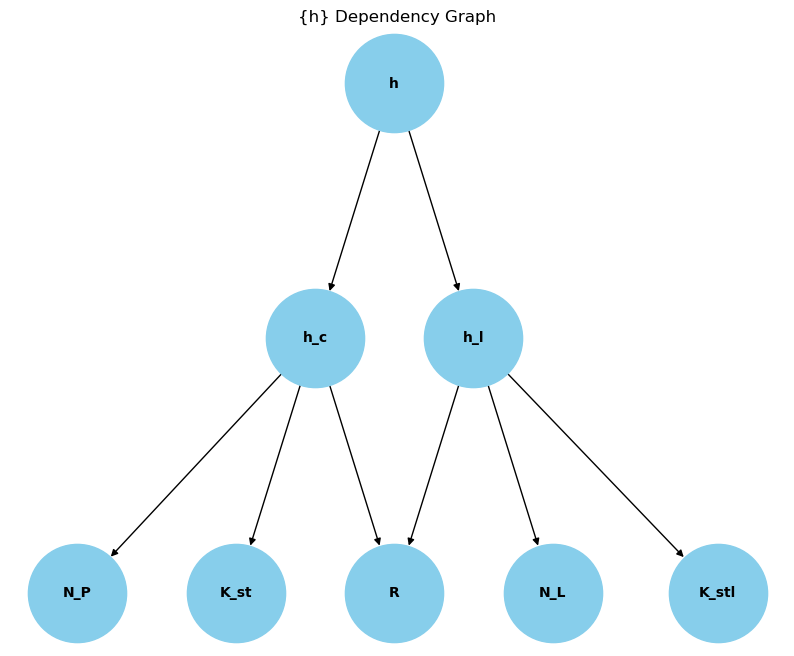

In [28]:
# import os
# os.environ["PATH"] += os.pathsep + r"C:\Users\kyanj\anaconda3\envs\fyp_env\Library\bin"

# Constants
# consts = {
#     "k_s": 0.14,
#     "k_t": 0.0315,
#     "k_l": 0.024,
#     "Rs": 3.4e-07,
#     "Rt": 9.6e-07,
#     "h_a": 0.8,
#     "σ_U": 21.0,
#     "α": 0.000201,
#     "λ": 6.05,
#     "β": 0.00011,
#     "γ": 200000.0,
#     "δ": 1.5e-5,
#     "P": 1,
    
#     "k": 1,
#     "p": 1,
#     "H": 1,
#     "θ": 1,
#     "σ": 1,
#     "K": 1,
#     "C": 1,
#     "A": 1,
#     "B": 1,
#     "k_f": 1,
#     "k_w": 1,
#     "h_f": 1,
#     "h_g": 1
# }

k_s = 0.14
k_t = 0.0315
k_l = 0.024
Rs = 3.4e-07
Rt = 9.6e-07
h_a = 0.8
σ_U = 21.0
α = 0.000201
λ = 6.05
β = 0.00011
γ = 200000.0
δ = 1.5e-5

k = 1
p = 1
H = 1
θ = 1
σ = 1
K = 1
C = 1
A = 1
B = 1
k_f = 1
k_w = 1
h_f = 1
h_g = 1
P = 0


# Variables
h = Symbol("h")
h_c = Symbol("h_c")
K_st = Symbol("K_st")
R = Symbol("R")
N_P = Symbol("N_P")
h_l = Symbol("h_l")
K_stl = Symbol("K_stl")
N_L = Symbol("N_L")

# exprs = [Eq(h, h_c + h_g), 
#             Eq(h, 1.45*k*(p/H)**0.985*tan(θ)/σ), 
#             Eq(h, 8000*λ*(K*p/(C*σ_U))**0.86), 
#             Eq(h, A*(1 - exp(-B*P))), 
#             Eq(h, 2*k_f*k_t*k_w*(1 - A)/(h_f*(-k_f*k_t - k_f*k_w + 2*k_t*k_w))), 

exprs = [Eq(h, h_a + h_c + h_l), 
            Eq(h_c, K_st*N_P*α/R), 
            Eq(K_st, 2/(1/k_t + 1/k_s)), 
            Eq(R, sqrt(Rs**2 + Rt**2)), 
            Eq(N_P, 1 - exp(-P*λ/σ_U)), 
            Eq(h_l, K_stl*N_L*β/R), 
            Eq(K_stl, 3/(1/k_t + 1/k_s + 1/k_l)), 
            Eq(N_L, 1 - exp(-γ*δ))]
print(exprs)


sol = solve(exprs)
print(sol[0][Symbol("h")])
# full_equations = ["h = Symbol('h')\nh_g = Symbol('h_g')\nh_c = Symbol('h_c')\ne = Eq(h, h_g + h_c)", "h = Symbol('h')\nk = Symbol('k')\nθ = Symbol('θ')\nσ = Symbol('σ')\np = Symbol('p')\nH = Symbol('H')\ne = Eq(h, 1.45*k*tan(θ)/σ*(p/H)**0.985)", "h = Symbol('h')\nλ = Symbol('λ')\np = Symbol('p')\nC = Symbol('C')\nσ_U = Symbol('σ_U')\nK = Symbol('K')\ne = Eq(h, 8000*λ*(p/(C*σ_U)*K)**0.86)", "h = Symbol('h')\nA = Symbol('A')\nB = Symbol('B')\nP = Symbol('P')\ne = Eq(h, A*(1 - exp(-B*P)))", "h = Symbol('h')\nA = Symbol('A')\nh_f = Symbol('h_f')\nk_f = Symbol('k_f')\nk_t = Symbol('k_t')\nk_w = Symbol('k_w')\ne = Eq(h, (1 - A)/h_f*2*k_f*k_t*k_w/(2*k_t*k_w - k_w*k_f - k_f*k_t))", "h = Symbol('h')\nh_a = Symbol('h_a')\nh_c = Symbol('h_c')\nh_l = Symbol('h_l')\ne = Eq(h, h_a + h_c + h_l)", "h_c = Symbol('h_c')\nα = Symbol('α')\nK_st = Symbol('K_st')\nN_P = Symbol('N_P')\nR = Symbol('R')\ne = Eq(h_c, α*K_st*N_P/R)", "K_st = Symbol('K_st')\nk_s = Symbol('k_s')\nk_t = Symbol('k_t')\ne = Eq(K_st, 2/(k_s**(-1) + k_t**(-1)))", "R = Symbol('R')\nR_s = Symbol('R_s')\nR_t = Symbol('R_t')\ne = Eq(R, sqrt(R_s**2 + R_t**2))", "N_P = Symbol('N_P')\nλ = Symbol('λ')\nP = Symbol('P')\nσ_U = Symbol('σ_U')\ne = Eq(N_P, 1 - exp(-λ*P/σ_U))", "h_l = Symbol('h_l')\nβ = Symbol('β')\nK_stl = Symbol('K_stl')\nN_L = Symbol('N_L')\nR = Symbol('R')\ne = Eq(h_l, β*K_stl*N_L/R)", "K_stl = Symbol('K_stl')\nk_s = Symbol('k_s')\nk_t = Symbol('k_t')\nk_l = Symbol('k_l')\ne = Eq(K_stl, 3/(k_s**(-1) + k_t**(-1) + k_l**(-1)))", "N_L = Symbol('N_L')\nγ = Symbol('γ')\nδ = Symbol('δ')\ne = Eq(N_L, 1 - exp(-γ*δ))"]
# exprs = [sympify(eq) for eq in full_equations]
eg = EquationGraph(exprs)
system = eg.get_system_of_equations()
eg.plot_graph()

Generating Curve: 100%|██████████| 101/101 [00:11<00:00,  8.67it/s]

[4.62215350545746, 5.19046128014000, 5.72694921928099, 6.23339893133098, 6.71149227159545, 7.16281692746310, 7.58887169091450, 7.99107143582017, 8.37075181655756, 8.72917370354977, 9.06752737045656, 9.38693644692224, 9.68846165000735, 9.97310430669555, 10.2418096791736, 10.4954701039275, 10.7349279550783, 10.9609784418007, 11.1743722491108, 11.3758180307970, 11.5659847627687, 11.7455039646407, 11.9149717969299, 12.0749510408286, 12.2259729671300, 12.3685391005104, 12.5031228850298, 12.6301712563791, 12.7501061260974, 12.8633257826862, 12.9702062142754, 13.0711023572321, 13.1663492748594, 13.2562632700989, 13.3411429359331, 13.4212701469742, 13.4969109955348, 13.5683166752862, 13.6357243154405, 13.6993577682276, 13.7594283522791, 13.8161355543911, 13.8696676919948, 13.9202025385343, 13.9679079138301, 14.0129422413875, 14.0554550745003, 14.0955875928994, 14.1334730715918, 14.1692373234505, 14.2029991170233, 14.2348705709475, 14.2649575262821, 14.2933598979927, 14.3201720067558, 14.345482

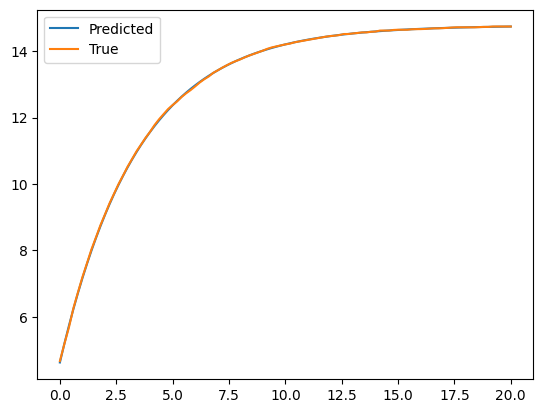

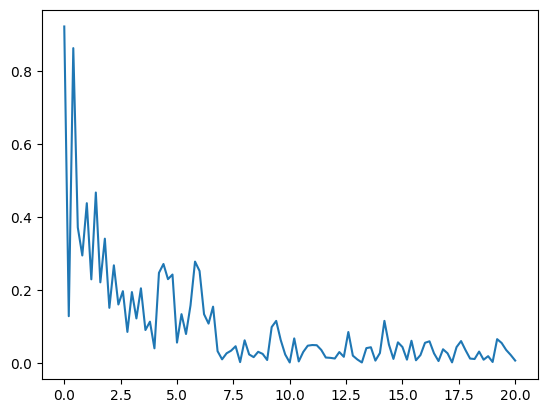

In [ ]:
column_names = ["P", "h"]
p20_df = pd.read_csv("Data/p20.csv", header=None, names=column_names)
P_list = pd.to_numeric(p20_df["P"]).tolist()
h_list_ref = pd.to_numeric(p20_df["h"]).tolist()
full_equations = ["h = Symbol('h')\nh_g = Symbol('h_g')\nh_c = Symbol('h_c')\ne = Eq(h, h_g + h_c)", "h = Symbol('h')\nk = Symbol('k')\nθ = Symbol('θ')\nσ = Symbol('σ')\np = Symbol('p')\nH = Symbol('H')\ne = Eq(h, 1.45*k*tan(θ)/σ*(p/H)**0.985)", "h = Symbol('h')\nλ = Symbol('λ')\np = Symbol('p')\nC = Symbol('C')\nσ_U = Symbol('σ_U')\nK = Symbol('K')\ne = Eq(h, 8000*λ*(p/(C*σ_U)*K)**0.86)", "h = Symbol('h')\nA = Symbol('A')\nB = Symbol('B')\nP = Symbol('P')\ne = Eq(h, A*(1 - exp(-B*P)))", "h = Symbol('h')\nA = Symbol('A')\nh_f = Symbol('h_f')\nk_f = Symbol('k_f')\nk_t = Symbol('k_t')\nk_w = Symbol('k_w')\ne = Eq(h, (1 - A)/h_f*2*k_f*k_t*k_w/(2*k_t*k_w - k_w*k_f - k_f*k_t))", "h = Symbol('h')\nh_a = Symbol('h_a')\nh_c = Symbol('h_c')\nh_l = Symbol('h_l')\ne = Eq(h, h_a + h_c + h_l)", "h_c = Symbol('h_c')\nα = Symbol('α')\nK_st = Symbol('K_st')\nN_P = Symbol('N_P')\nR = Symbol('R')\ne = Eq(h_c, α*K_st*N_P/R)", "K_st = Symbol('K_st')\nk_s = Symbol('k_s')\nk_t = Symbol('k_t')\ne = Eq(K_st, 2/(k_s**(-1) + k_t**(-1)))", "R = Symbol('R')\nR_s = Symbol('R_s')\nR_t = Symbol('R_t')\ne = Eq(R, sqrt(R_s**2 + R_t**2))", "N_P = Symbol('N_P')\nλ = Symbol('λ')\nP = Symbol('P')\nσ_U = Symbol('σ_U')\ne = Eq(N_P, 1 - exp(-λ*P/σ_U))", "h_l = Symbol('h_l')\nβ = Symbol('β')\nK_stl = Symbol('K_stl')\nN_L = Symbol('N_L')\nR = Symbol('R')\ne = Eq(h_l, β*K_stl*N_L/R)", "K_stl = Symbol('K_stl')\nk_s = Symbol('k_s')\nk_t = Symbol('k_t')\nk_l = Symbol('k_l')\ne = Eq(K_stl, 3/(k_s**(-1) + k_t**(-1) + k_l**(-1)))", "N_L = Symbol('N_L')\nγ = Symbol('γ')\nδ = Symbol('δ')\ne = Eq(N_L, 1 - exp(-γ*δ))"]
const_dict = {'k_s (kW/mK)': 0.14, 'k_t (H13)': 0.0244, 'k_t (Cast iron)': 0.044, 'k_t (P20)': 0.0315, 'k_l (Lubricant)': 0.024, 'R_s (m)': 3.4e-07, 'R_t (H13)': 9.8e-07, 'R_t (Cast iron)': 8.1e-07, 'R_t (P20)': 9.6e-07, 'h_a (kW/m2K)': 0.8, 'σ_U (MPa)': 21.0, 'α (−)': 0.000201, 'λ (−)': 6.05, 'β (−)': 0.00011, 'γ (m−1)': 200000.0}

solver = SystemOfEquations(equations=full_equations)
solutions = solver.solve_system(const_dict=const_dict,
                                independent_vals=P_list,
                                independent_symbol="P",
                                target_symbol="h",
                                equation_number=6)


print(solutions)
solver.plot_graph(P_list, solutions, h_list_ref)
solver.plot_error_graph(P_list, solutions, h_list_ref)

In [6]:

    
    # def _solve_system(self, equations, x_vals, target):
    #     k_s = 0.14
    #     k_t = 0.0315
    #     k_l = 0.024
    #     Rs = 3.4e-07
    #     Rt = 9.6e-07
    #     h_a = 0.8
    #     σ_U = 21.0
    #     α = 0.000201
    #     λ = 6.05
    #     β = 0.00011
    #     γ = 200000.0
    #     δ = 1.5e-5

    #     k = 1
    #     p = 1
    #     H = 1
    #     θ = 1
    #     σ = 1
    #     K = 1
    #     C = 1
    #     A = 1
    #     B = 1
    #     k_f = 1
    #     k_w = 1
    #     h_f = 1
    #     h_g = 1

    #     # Variables
    #     h = Symbol("h")
    #     h_c = Symbol("h_c")
    #     K_st = Symbol("K_st")
    #     R = Symbol("R")
    #     N_P = Symbol("N_P")
    #     h_l = Symbol("h_l")
    #     K_stl = Symbol("K_stl")
    #     N_L = Symbol("N_L")
        
        
        
    #     y_pred = []
    #     for x in tqdm(x_vals, desc='Generating Curve'):
    #         P = x
    #         exprs = [Eq(h, h_a + h_c + h_l), 
    #         Eq(h_c, K_st*N_P*α/R), 
    #         Eq(K_st, 2/(1/k_t + 1/k_s)), 
    #         Eq(R, sqrt(Rs**2 + Rt**2)), 
    #         Eq(N_P, 1 - exp(-P*λ/σ_U)), 
    #         Eq(h_l, K_stl*N_L*β/R), 
    #         Eq(K_stl, 3/(1/k_t + 1/k_s + 1/k_l)), 
    #         Eq(N_L, 1 - exp(-γ*δ))]
    #         sol = solve(exprs)[0] # equations
    #         # print(sol)
    #         y_pred.append(sol[target])
    #     return y_pred

In [3]:
x, y = symbols("x y")
e = "Eqd(yd, x+1)"

def check(equation):
    try:
        ex = parse_expr(equation)
        return True
    except Exception as e:
        print(f"Error in sympify: {e}")
        return False
    
print(check(e))


True


In [8]:
def strict_check(equation):
    try:
        expr = parse_expr(equation, evaluate=False)
        # Check if any undefined functions are present
        return True
        return True
    except Exception as e:
        print(f"Error in parse_expr: {e}")
        return False

print(strict_check("Eqd(y, x+1)"))  # This should now return False

True


In [7]:
from sympy.parsing.sympy_parser import parse_expr
from sympy.core.function import AppliedUndef

def is_valid_sympy_expression(expr_str):
    """
    Returns True if the string is a valid SymPy expression with only
    defined functions or operators. Flags undefined function calls.
    """
    try:
        expr = parse_expr(expr_str, evaluate=False)
        # Check for undefined functions like Eqd(...) or Foo(...)
        if expr.has(AppliedUndef):
            return False
        return True
    except Exception:
        return False


In [12]:
print(is_valid_sympy_expression("Eq(x, y + 1)"))    # ✅ True
print(is_valid_sympy_expression("Eq(yd9, x+1)"))     # ❌ False
print(is_valid_sympy_expression("x + sin(y)"))       # ✅ True
print(is_valid_sympy_expression("CustomFunc(x)"))    # ❌ False
real = """h = Symbol('h')
h_g = Symbol('h_g')
h_c = Symbol('h_c')
e = Eq(h, h_g + h_c)"""
print(is_valid_sympy_expression(real))      # ❌ False

e = Eq(h, h_c + h_g)
print(is_valid_sympy_expression(e))

True
True
True
False
False


NameError: name 'h' is not defined